### Finding all people present inside our dataset

In [ ]:
!pip install keras==2.4.3
!pip install tensorflow==2.3.0
!pip install mtcnn==0.1.0

In [ ]:
!wget -O dataset.zip https://techlearn-cdn.s3.amazonaws.com/bs_face_recognition/dataset.zip

--2022-01-21 10:33:52--  https://techlearn-cdn.s3.amazonaws.com/bs_face_recognition/dataset.zip
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.158.107
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.158.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4246432 (4.0M) [application/x-zip-compressed]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   4.05M  3.64MB/s    in 1.1s    

2022-01-21 10:33:54 (3.64 MB/s) - ‘dataset.zip’ saved [4246432/4246432]



In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/Akshay Kumar/pic1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Akshay Kumar/pic1.jpg  
replace dataset/Akshay Kumar/pic10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Akshay Kumar/pic10.jpg  
replace dataset/Akshay Kumar/pic2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Akshay Kumar/pic2.jpg  
replace dataset/Akshay Kumar/pic3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Akshay Kumar/pic3.jpg  
replace dataset/Akshay Kumar/pic4.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Akshay Kumar/pic4.jpg  
replace dataset/Akshay Kumar/pic5.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Akshay Kumar/pic5.jpg  
replace dataset/Akshay Kumar/pic6.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/Akshay Kumar/pic6.jpg  
  inflating: dataset/Akshay Kumar/pic7.jpg  
  inflating: dataset/Akshay Kumar/pic8.jpg  
  inflating: datas

In [ ]:
import os

In [ ]:
face_dataset_folder = "dataset/"

for folder in os.listdir(face_dataset_folder):
    print(folder)

Amitabh Bachchan
Akshay Kumar
Katrina Kaif
Narendra Modi


### Visualizing some images from each folder

In [ ]:
r g b 

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

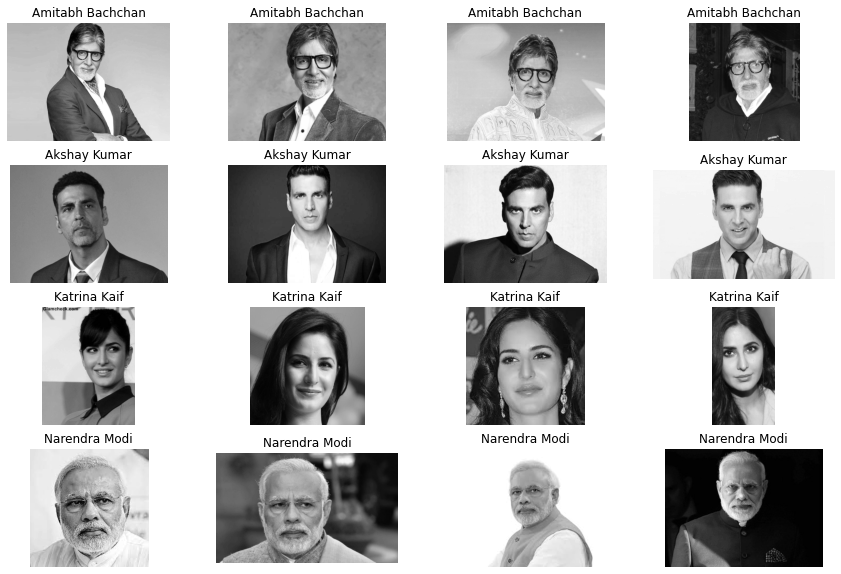

In [ ]:
plt.figure(figsize = (15 , 10))
counter = 0

for folder in os.listdir(face_dataset_folder):
    folder_counter = 0
    for image_file in os.listdir(face_dataset_folder + folder):
        if folder_counter == 4:
            break
        image = cv2.imread(face_dataset_folder + folder + '/' + image_file, 0)
        
        plt.subplot(4, 4, counter + 1)
        plt.axis('off')
        plt.imshow(image, cmap = "gray")
        plt.title(folder)
        
        counter = counter + 1
        folder_counter = folder_counter + 1

plt.show()

#gray is because matplotlib works in 2d so third layer which is blue is eliminated from the images.

### Detecting Faces in an Image

In [ ]:
import mtcnn

In [ ]:
# Creating an instance of MTCNN Face Detector
detector = mtcnn.MTCNN()

In [ ]:
def face_detection(filename):
    all_faces = detector.detect_faces(plt.imread(filename))
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    #gca is the coordinates on which we have to draw the rectangle - get current axis
    for result in all_faces:
        x, y, width, height = result['box']
        print(result)
        rect = plt.Rectangle((x, y), width, height, fill = False, color = 'blue')
        ax.add_patch(rect)
        #Add rectangle on the image
        plt.show()

{'box': [333, 513, 829, 1079], 'confidence': 0.9999982118606567, 'keypoints': {'left_eye': (565, 944), 'right_eye': (934, 867), 'nose': (794, 1110), 'mouth_left': (663, 1327), 'mouth_right': (982, 1262)}}


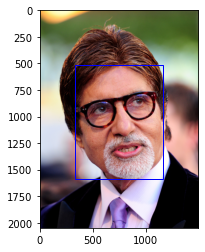

In [ ]:
face_detection('dataset/Amitabh Bachchan/pic1.jpg')

### Finding Embeddings for an Image

#### 1. Loading Facenet model to find embeddings

In [ ]:
!wget -O facenet.h5 https://techlearn-cdn.s3.amazonaws.com/bs_face_recognition/facenet.h5

--2022-01-21 10:46:02--  https://techlearn-cdn.s3.amazonaws.com/bs_face_recognition/facenet.h5
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.160.27
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.160.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92397640 (88M) [application/octet-stream]
Saving to: ‘facenet.h5’

facenet.h5          100%[===================>]  88.12M  15.5MB/s    in 6.5s    

2022-01-21 10:46:09 (13.6 MB/s) - ‘facenet.h5’ saved [92397640/92397640]



In [ ]:
from tensorflow.keras.models import load_model

facnet_path = 'facenet.h5'
required_size = (160, 160)
facenet = load_model(facnet_path)

#### 2. Finding face in image and passing it to facenet to get its embedding

In [ ]:
def get_face(img, box):
    x1, y1, width, height = box
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = img[y1:y2, x1:x2]
    return face, (x1, y1), (x2, y2)

def normalize(img):
    mean, std = img.mean(), img.std()
    return (img - mean) / std

In [ ]:
encodes = []
file_name = 'dataset/Amitabh Bachchan/pic1.jpg'

img = cv2.imread(file_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = detector.detect_faces(img_rgb)
if results:
    res = max(results, key = lambda b: b['box'][2] * b['box'][3]) # If they are many faces, he will take 
    face, _, _ = get_face(img_rgb, res['box'])                    # with max width and height
    face = normalize(face)
    face = cv2.resize(face, required_size) #160*160 dimension
    encode = facenet.predict(np.expand_dims(face, axis=0))[0] #128 vectors

print(encode)

[-0.9495752  -1.0520624   1.6151034  -0.7486569  -1.660751    1.6022017
 -0.8106624  -0.12857899  0.2494016  -0.3432834  -0.15066627  1.5488815
  0.44210505  1.471413   -1.2732096   0.645005    2.1625106  -0.57193476
  0.4327945  -0.8179764   1.1747545  -1.6170788  -0.7976651  -0.15918803
  0.36522815 -2.2293692   0.04306598 -0.7552657   0.70870316 -0.62985647
 -0.01930504  0.21607462  0.81792927 -0.6255361   0.9570656  -0.8892432
 -1.1132979  -0.39319408 -0.77577436  1.6683751   0.9964447  -1.0747999
  1.3023034   2.7830417  -0.4271895  -0.75096136  0.5132546  -0.75703394
  1.3030275  -0.5719596  -0.87971914 -1.4234287   0.20216712 -0.9362012
  0.85213834 -1.0877748  -0.03573484 -0.21081972 -1.561678   -0.27135387
 -1.2527902   0.2225549  -0.9352826  -1.5338086  -0.92425245  1.5355119
  0.40202963  1.034448    0.48447984  0.31515816 -0.19105628  1.2646087
  0.21975088 -0.357172    0.04358271 -0.18362735  1.9880639  -0.4508004
  0.6980848   0.8846231  -0.11917575 -1.1383668   0.8073122

### Creating Embeddings for all Images and storing it under a Dictionary

In [ ]:
people_name_to_digit = {"Akshay Kumar" : 0,
                        "Amitabh Bachchan" : 1,
                        "Katrina Kaif" : 2,
                        "Narendra Modi" : 3}

people_digit_to_name = {0 : "Akshay Kumar",
                        1: "Amitabh Bachchan",
                        2: "Katrina Kaif",
                        3: "Narendra Modi"}

embeddings_dic = {}

In [ ]:
from sklearn.preprocessing import Normalizer
# the face print of Amitabh Bachapan in 15 pictures will be different but mean will be same, so to process it faster we will process it.
l2_normalizer = Normalizer('l2')

In [ ]:
for folder in os.listdir(face_dataset_folder):
    encodes = list()
    for image_file in os.listdir(face_dataset_folder + folder):
        
        # loading images from each folder
        image = cv2.imread(face_dataset_folder + folder + '/' + image_file)
        image = cv2.resize(image, (160, 160))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # finding face from each loaded image
        results = detector.detect_faces(image)
        if results:
            res = max(results, key = lambda b: b['box'][2] * b['box'][3])
            face, _, _ = get_face(img_rgb, res['box'])
            face = normalize(face)
            face = cv2.resize(face, required_size)
            encode = facenet.predict(np.expand_dims(face, axis=0))[0]
            encodes.append(encode)
    
    # finding mean of all encodings and saving it in embedding_dic
    if encodes:
        encode = np.sum(encodes, axis=0) # column wise sum
        encode = l2_normalizer.transform(np.expand_dims(encode, axis=0))[0]
        embeddings_dic[people_name_to_digit.get(folder)] = encode

print('Done finding embeddings for all persons')

Done finding embeddings for all persons


In [ ]:
embeddings_dic

{0: array([-0.00812761, -0.09587185, -0.06210598, -0.12988779,  0.07478224,
         0.02138617, -0.00371372, -0.04789267,  0.02103719,  0.0246159 ,
         0.05995974, -0.07176441,  0.02291412, -0.10251795, -0.01321788,
         0.08325624,  0.1168278 , -0.12941112,  0.06505278, -0.1331148 ,
         0.01536237,  0.02604374, -0.04865738, -0.00180863,  0.04783401,
        -0.02206228,  0.16981004,  0.09232725, -0.06658604, -0.03164849,
        -0.05216747,  0.09174616,  0.03826045, -0.0045    ,  0.12833261,
        -0.07284969,  0.06993578,  0.02538735,  0.17794944,  0.01282019,
         0.04549695,  0.02452682, -0.04101885, -0.07545875, -0.12775151,
        -0.12161944, -0.02100777, -0.06747208,  0.09900406,  0.08309887,
        -0.08519782,  0.07588708,  0.07231676, -0.13636406,  0.0408069 ,
         0.10430062,  0.10493086,  0.00548844, -0.04710282, -0.25873178,
        -0.10454983, -0.08359862, -0.01946557,  0.1934576 , -0.0366397 ,
         0.12081148,  0.05908302, -0.00691359,  

### Recognizing people in Image using Facenet and pre stored embeddings

In [ ]:
!wget -O test1.jpg https://c.ndtvimg.com/2020-03/b4ml9bd8_amitabh-bachchan_625x300_24_March_20.jpg

--2022-01-21 11:00:03--  https://c.ndtvimg.com/2020-03/b4ml9bd8_amitabh-bachchan_625x300_24_March_20.jpg
Resolving c.ndtvimg.com (c.ndtvimg.com)... 104.85.5.33, 2a02:26f0:b200:389::24e8, 2a02:26f0:b200:381::24e8
Connecting to c.ndtvimg.com (c.ndtvimg.com)|104.85.5.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22453 (22K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>]  21.93K  --.-KB/s    in 0s      

2022-01-21 11:00:03 (150 MB/s) - ‘test1.jpg’ saved [22453/22453]



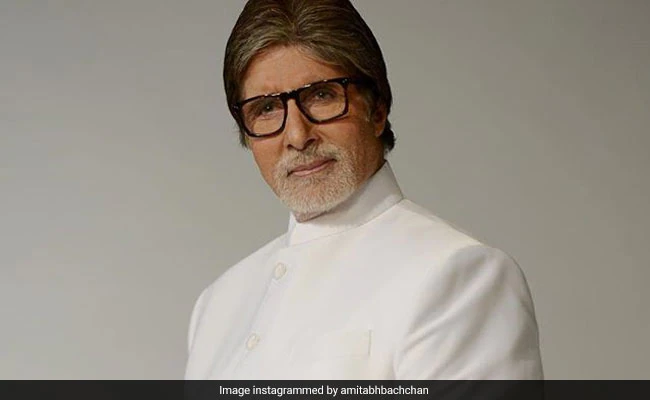

In [ ]:
!wget -O test2.jpg https://c.ndtvimg.com/2020-03/7gn18ucg_sooryavanshi-_625x300_02_March_20.jpg

--2022-01-21 11:00:14--  https://c.ndtvimg.com/2020-03/7gn18ucg_sooryavanshi-_625x300_02_March_20.jpg
Resolving c.ndtvimg.com (c.ndtvimg.com)... 104.85.5.33, 2a02:26f0:b200:389::24e8, 2a02:26f0:b200:381::24e8
Connecting to c.ndtvimg.com (c.ndtvimg.com)|104.85.5.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35135 (34K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>]  34.31K  --.-KB/s    in 0.06s   

2022-01-21 11:00:15 (532 KB/s) - ‘test2.jpg’ saved [35135/35135]



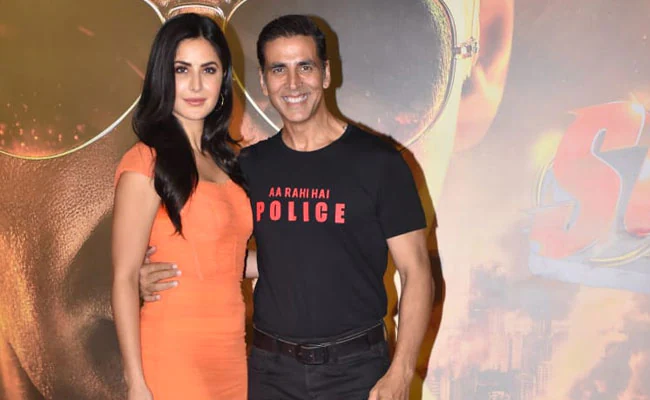

In [ ]:
from scipy.spatial.distance import cosine

def recognize_person(test_image_path, recognition_t = 1.0, confidence_t = 0.95, required_size = (160, 160)):
    test_image = cv2.imread(test_image_path)
    img_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    results = detector.detect_faces(img_rgb)
    for res in results:
        if res['confidence'] < confidence_t:
            continue
        
        face, pt_1, pt_2 = get_face(img_rgb, res['box'])
        face = normalize(face)
        face = cv2.resize(face, required_size)
        encode = facenet.predict(np.expand_dims(face, axis=0))[0]
        encode = l2_normalizer.transform(encode.reshape(1, -1))[0]
        name = 'Unknown'
        distance = float("inf")
        
        for db_name, db_encode in embeddings_dic.items():
            dist = cosine(db_encode, encode)
            if dist < recognition_t and dist < distance:
                name = people_digit_to_name.get(db_name)
                distance = dist
        
        print(name)
        cv2.rectangle(test_image, pt_1, pt_2, (255, 0, 0), 2)
        cv2.putText(test_image, name, (pt_1[0], pt_1[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 200), 1)
    return test_image

In [ ]:
from google.colab.patches import cv2_imshow

Amitabh Bachchan


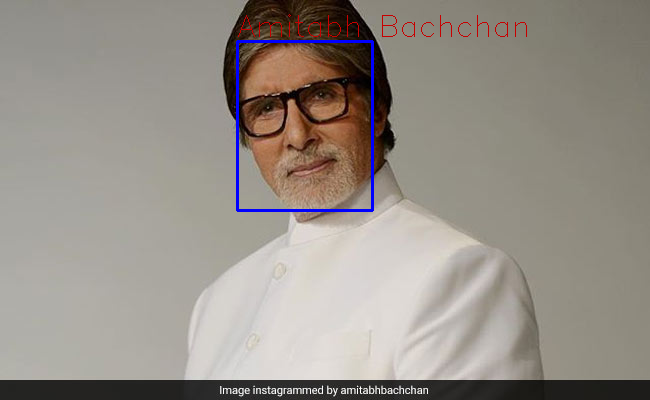

In [ ]:
cv2_imshow(recognize_person('test1.jpg'))

Akshay Kumar
Katrina Kaif


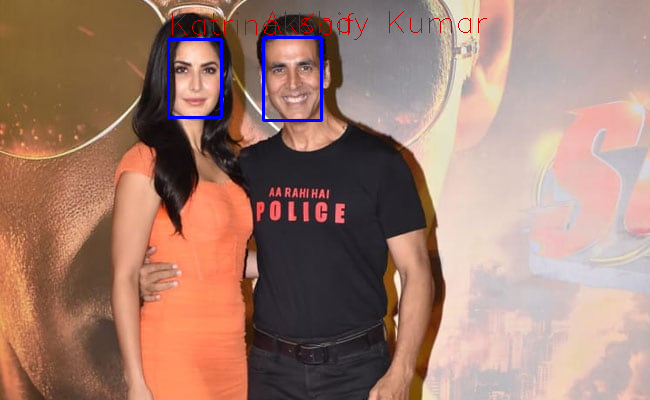

In [ ]:
cv2_imshow(recognize_person('test2.jpg'))